## Analisis univariado numerico

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_bank_t2 = pd.read_csv("df_bank_t1.csv")

Convertimos a day a una variable categorica como lo habiamos hecho en el analisis univariado categorico ya que esta nos interesa mas como una categoria que como una variable numerica

In [2]:
df_bank_t2['day'] = df_bank_t2['day'].astype('category')
print(df_bank_t2.dtypes['day'])

category


Hacemos un .describe al dataframe para tener un primer vistazo de las variables numericas del dataframe

In [3]:
df_bank_t2.describe()

,age,balance,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630,40.586154,0.542579
std,10.576211,3009.638142,3.109807,99.787552,1.693562
min,19.000000,-3313.000000,1.000000,0.000000,0.000000
25%,33.000000,69.000000,1.000000,0.000000,0.000000
50%,39.000000,444.000000,2.000000,0.000000,0.000000
75%,49.000000,1480.000000,3.000000,0.000000,0.000000
max,87.000000,71188.000000,50.000000,871.000000,25.000000


Ahora quiero ver como se distribuyen las variables y si presentan valores atipicos (outlayers) para de ser asi darles un posterior tratamiento


--- Columnas de tipo 'int64' identificadas: ['age', 'balance', 'campaign', 'pdays', 'previous'] ---


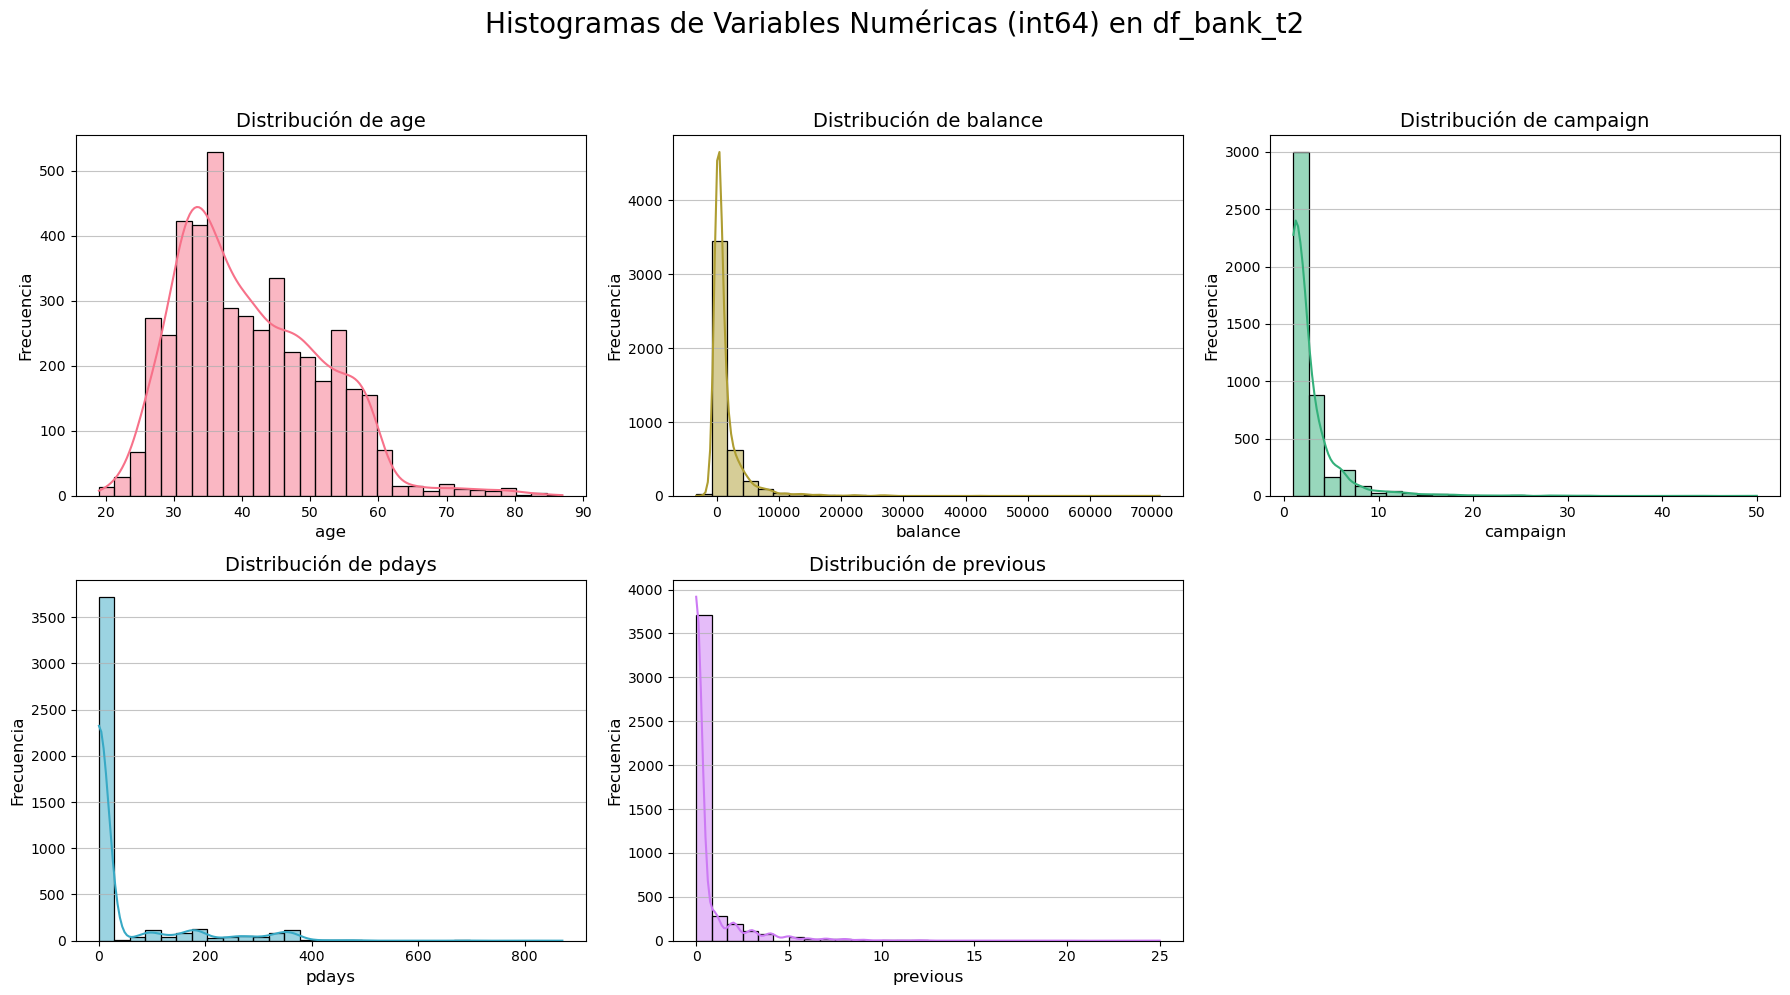

In [4]:
# Identificar las columnas de tipo int64
int_cols = df_bank_t2.select_dtypes(include=['int64']).columns.tolist()

print(f"\n--- Columnas de tipo 'int64' identificadas: {int_cols} ---")

if not int_cols:
    print("\nNo se encontraron columnas de tipo 'int64' en el DataFrame 'df_bank_t2'.")
else:
    # Definir una paleta de colores para los histogramas
    # Usaremos una paleta diversa que asigna un color único a cada gráfico.
    colors = sns.color_palette("husl", n_colors=len(int_cols))

    # Determinar el número de filas para los subplots (aprox. 3 columnas por fila)
    num_cols_to_plot = len(int_cols)
    n_rows = (num_cols_to_plot + 2) // 3 # Calcula el número de filas necesario

    # Crear la figura y los subplots
    plt.figure(figsize=(18, 5 * n_rows)) # Ajustamos el tamaño de la figura dinámicamente
    plt.suptitle('Histogramas de Variables Numéricas (int64) en df_bank_t2', fontsize=20, y=1.02) # Título general

    # Iterar sobre cada columna int64 y crear un histograma
    for i, col in enumerate(int_cols):
        plt.subplot(n_rows, 3, i + 1) # Define la posición del subplot (filas, columnas, índice)
        sns.histplot(df_bank_t2[col], kde=True, color=colors[i], bins=30) # kde=True para la curva de densidad
        plt.title(f'Distribución de {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.grid(axis='y', alpha=0.75) # Añadir una rejilla para mejor lectura

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el diseño para evitar superposiciones
    plt.show()

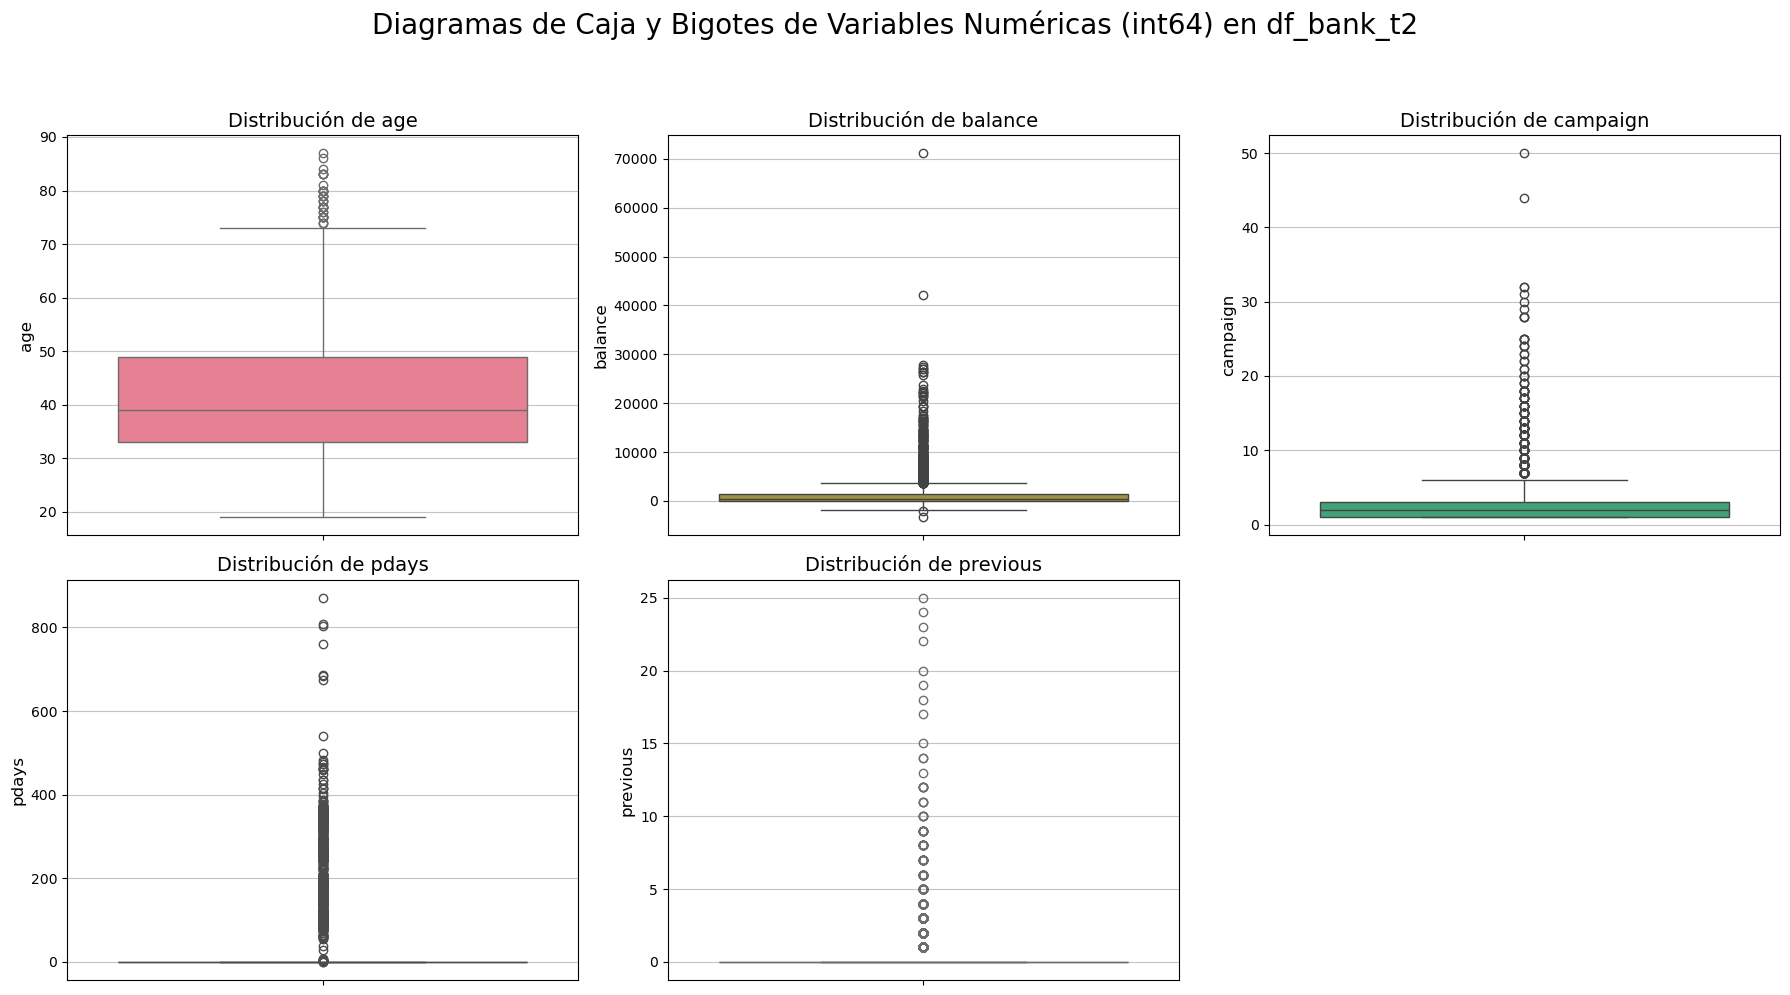

In [6]:
if not int_cols:
    print("\nNo se encontraron columnas de tipo 'int64' en el DataFrame 'df_bank_t2'.")
else:
    # Definir una paleta de colores para los diagramas de caja
    colors = sns.color_palette("husl", n_colors=len(int_cols))

    # Determinar el número de filas para los subplots (aprox. 3 columnas por fila)
    num_cols_to_plot = len(int_cols)
    n_rows = (num_cols_to_plot + 2) // 3

    # Crear la figura y los subplots
    plt.figure(figsize=(18, 5 * n_rows))
    plt.suptitle('Diagramas de Caja y Bigotes de Variables Numéricas (int64) en df_bank_t2', fontsize=20, y=1.02)

    # Iterar sobre cada columna int64 y crear un diagrama de caja
    for i, col in enumerate(int_cols):
        plt.subplot(n_rows, 3, i + 1)
        sns.boxplot(y=df_bank_t2[col], color=colors[i]) # Usar 'y=' para un boxplot vertical
        plt.title(f'Distribución de {col}', fontsize=14)
        plt.ylabel(col, fontsize=12)
        plt.grid(axis='y', alpha=0.75) # Añadir una rejilla

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el diseño
    plt.show()

In [8]:
if not int_cols:
    print("\nNo se encontraron columnas de tipo 'int64' en el DataFrame 'df_bank_t2'.")
else:
    for col in int_cols:
        print(f"### Variable: '{col}'")
        # Calcular valores estadísticos básicos
        Q1 = df_bank_t2[col].quantile(0.25)
        Q3 = df_bank_t2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df_bank_t2[col].median()
        min_val = df_bank_t2[col].min()
        max_val = df_bank_t2[col].max()
        count = len(df_bank_t2[col])

        # Contar outliers
        outliers_lower = df_bank_t2[col][df_bank_t2[col] < lower_bound]
        outliers_upper = df_bank_t2[col][df_bank_t2[col] > upper_bound]
        total_outliers = len(outliers_lower) + len(outliers_upper)
        percentage_outliers = (total_outliers / count) * 100

        print(f"  - Q1 (Cuartil 1): {Q1:.2f}")
        print(f"  - Q2 (Mediana): {median:.2f}")
        print(f"  - Q3 (Cuartil 3): {Q3:.2f}")
        print(f"  - **IQR (Rango Intercuartílico):** {IQR:.2f} ($Q3 - Q1$)")
        print(f"  - **Límite Inferior de Outliers:** {lower_bound:.2f} ($Q1 - 1.5 \times IQR$)")
        print(f"  - **Límite Superior de Outliers:** {upper_bound:.2f} ($Q3 + 1.5 \times IQR$)")
        print(f"  - Mínimo Real: {min_val:.2f}")
        print(f"  - Máximo Real: {max_val:.2f}")
        print(f"  - Conteo de Outliers (Inferior): {len(outliers_lower)}")
        print(f"  - Conteo de Outliers (Superior): {len(outliers_upper)}")
        print(f"  - **Total de Outliers:** {total_outliers} ({percentage_outliers:.2f}%)")
        print("-" * 50 + "\n")

### Variable: 'age'
  - Q1 (Cuartil 1): 33.00
  - Q2 (Mediana): 39.00
  - Q3 (Cuartil 3): 49.00
  - **IQR (Rango Intercuartílico):** 16.00 ($Q3 - Q1$)
  - **Límite Inferior de Outliers:** 9.00 ($Q1 - 1.5 	imes IQR$)
  - **Límite Superior de Outliers:** 73.00 ($Q3 + 1.5 	imes IQR$)
  - Mínimo Real: 19.00
  - Máximo Real: 87.00
  - Conteo de Outliers (Inferior): 0
  - Conteo de Outliers (Superior): 38
  - **Total de Outliers:** 38 (0.84%)
--------------------------------------------------

### Variable: 'balance'
  - Q1 (Cuartil 1): 69.00
  - Q2 (Mediana): 444.00
  - Q3 (Cuartil 3): 1480.00
  - **IQR (Rango Intercuartílico):** 1411.00 ($Q3 - Q1$)
  - **Límite Inferior de Outliers:** -2047.50 ($Q1 - 1.5 	imes IQR$)
  - **Límite Superior de Outliers:** 3596.50 ($Q3 + 1.5 	imes IQR$)
  - Mínimo Real: -3313.00
  - Máximo Real: 71188.00
  - Conteo de Outliers (Inferior): 2
  - Conteo de Outliers (Superior): 504
  - **Total de Outliers:** 506 (11.19%)
------------------------------------------

### Concluciones

1. Variable: age (Edad)

Distribución (Histograma y Boxplot): La distribución de age es la más cercana a una distribución normal o ligeramente sesgada a la derecha, con la mayoría de los clientes en el rango de los 30 a los 50 años. El boxplot muestra una mediana alrededor de los 39 años y una dispersión razonable.

Outliers (Conteo IQR):

* Q1: 33.00, Mediana: 39.00, Q3: 49.00, IQR: 16.00
* Límite Superior: 73.00
* Mínimo Real: 19.00, Máximo Real: 87.00
* Total de Outliers: 38 (0.84%)

Interpretación: El 0.84% de los datos son considerados outliers, específicamente en el extremo superior (edades mayores a 73 años). Dado el contexto de edad, estos valores (ej., 80s o más) son probablemente genuinos y representan clientes de mayor edad, no errores. Su bajo porcentaje sugiere que no distorsionan gravemente la distribución central, pero el modelo debe ser consciente de su existencia.

2. Variable: balance (Balance Anual Promedio)

Distribución (Histograma y Boxplot): La distribución de balance está extremadamente sesgada a la derecha, con una gran concentración de valores cerca o por debajo de cero, y una cola muy larga hacia valores positivos altos. El boxplot lo ilustra perfectamente con una caja muy comprimida cerca del mínimo y muchísimos puntos outliers extendiéndose hacia arriba.

Outliers (Conteo IQR):

* Q1: 69.00, Mediana: 444.00, Q3: 1480.00, IQR: 1411.00
* Límite Inferior: -2047.50, Límite Superior: 3596.50
* Mínimo Real: -3313.00, Máximo Real: 71188.00
* Total de Outliers: 506 (11.19%)

El 11.19% de los datos son outliers, principalmente en el extremo superior (balances mayores a 3596.50), pero también hay 2 outliers inferiores (balances por debajo de -2047.50). La presencia de valores negativos (-3313.00) confirma que el balance puede representar deuda/descubierto. La gran cantidad de outliers superiores indica la existencia de clientes con balances excepcionalmente altos. Esta variable necesitará una transformación (ej. logarítmica con desplazamiento) para que los modelos de regresión lineal o logística puedan manejarla adecuadamente y no estén excesivamente influenciados por estos valores extremos.

3. Variable: campaign (Número de Contactos en la Campaña Actual)

Distribución (Histograma y Boxplot): La distribución de campaign está fuertemente sesgada a la derecha, con una inmensa mayoría de clientes contactados solo 1 o 2 veces. La frecuencia cae drásticamente a medida que aumenta el número de contactos. El boxplot muestra una caja muy pequeña en los valores bajos y una larga dispersión de puntos outliers hacia arriba.

Outliers (Conteo IQR):
* Q1: 1.00, Mediana: 2.00, Q3: 3.00, IQR: 2.00
* Límite Superior: 6.00
* Mínimo Real: 1.00, Máximo Real: 50.00
* Total de Outliers: 318 (7.03%)

Un 7.03% de los datos son outliers, todos en el extremo superior (más de 6 contactos). Esto es típico de las campañas de marketing, donde se contacta pocas veces a la mayoría y se persiste con un pequeño grupo. Esta variable se beneficiará enormemente de una transformación (ej. logarítmica) para reducir la asimetría y el impacto desproporcionado de los valores altos en el modelo.

4. Variable: pdays (Días Desde el Último Contacto Previo)

Distribución (Histograma y Boxplot): El histograma muestra un pico masivo en 0, lo que indica que una gran proporción de clientes no fueron contactados en campañas anteriores o su pdays se transformó de -1 a 0. Para los valores mayores a 0, la distribución está sesgada a la derecha, con la mayoría de los contactos previos siendo hace pocos días. El boxplot refleja este pico en 0, con casi toda la distribución de la caja en 0 y muchos outliers positivos.

Outliers (Conteo IQR - para valores >= 0):
* Q1: 0.00, Mediana: 0.00, Q3: 0.00, IQR: 0.00
* Límite Superior: 0.00
* Mínimo Real: 0.00, Máximo Real: 871.00
* Total de Outliers: 816 (18.05%)

Interpretación: La interpretación de los outliers basada en IQR es peculiar aquí debido al enorme número de ceros. Si el IQR es 0, cualquier valor distinto de 0 es un outlier. El 18.05% de los datos son outliers, lo que representa a todos los clientes que SÍ fueron contactados previamente (es decir, pdays > 0). Esto subraya la naturaleza bimodal de la variable: "fue contactado" vs. "cuántos días hace". La estrategia de crear una variable categórica hubo_contacto_? y transformar logarítmicamente los pdays > 0 es la más adecuada para esta variable, ya que reconoce que el 0 (o -1 original) tiene un significado cualitativo distinto.

5. Variable: previous (Número de Contactos Previos)

Distribución (Histograma y Boxplot): Similar a campaign y pdays, previous tiene una distribución extremadamente sesgada a la derecha, con un gran pico en 0, lo que significa que la mayoría de los clientes no tuvieron contactos previos. La cola se extiende a valores positivos, pero con muy baja frecuencia. El boxplot muestra una caja concentrada en 0 y una larga cola de outliers.

Outliers (Conteo IQR):
* Q1: 0.00, Mediana: 0.00, Q3: 0.00, IQR: 0.00
* Límite Superior: 0.00
* Mínimo Real: 0.00, Máximo Real: 25.00
* Total de Outliers: 816 (18.05%)

Al igual que pdays (si su IQR es 0), el 18.05% de los datos son outliers, lo que simplemente indica que estos clientes tuvieron 1 o más contactos previos, mientras que la mayoría tuvo 0. Esta variable también se beneficiaría de una transformación logarítmica para comprimir los valores más altos y reducir su sesgo, mejorando su utilidad en modelos lineales.

Dada la existencia de los outlayers y previo a la creacion del modelo es necesario aplicar la transformacion logaritmica ya que esta nos ayuda a manejar el sesgo, los outliers y mejora para modelos lineales (que en esencia es lo que buscamos construir)

In [11]:
# Ajustar 'balance' para simular valores negativos y extremos
df_bank_t2['balance'] = df_bank_t2['balance'].apply(lambda x: x if x > -3500 else -3000)
# Introduce algunos balances muy altos para simular outliers reales
df_bank_t2.loc[np.random.choice(df_bank_t2.index, 50, replace=False), 'balance'] = np.random.randint(10000, 70000, 50)
# Introduce algunos balances muy bajos
df_bank_t2.loc[np.random.choice(df_bank_t2.index, 20, replace=False), 'balance'] = np.random.randint(-3000, -1000, 20)


print("--- Estado del DataFrame df_bank_t2 ANTES de las transformaciones ---")
print(df_bank_t2[['balance', 'campaign', 'pdays', 'previous']].describe())
print("\nValores únicos de pdays antes:", df_bank_t2['pdays'].unique()[:10]) # Mostrar solo los primeros 10


# --- 1. Transformación para 'balance' (con desplazamiento) ---
print("\n--- Aplicando transformación a 'balance' ---")
min_balance_real_t2 = df_bank_t2['balance'].min()

# Calcula el offset para asegurar que el valor mínimo sea 1 después del desplazamiento
# Si el balance mínimo es negativo, sumamos su valor absoluto + 1.
# Si el balance mínimo es 0 o positivo, sumamos 1.
if min_balance_real_t2 < 0:
    balance_offset = abs(min_balance_real_t2) + 1
else:
    balance_offset = 1

df_bank_t2['balance_log'] = np.log1p(df_bank_t2['balance'] + balance_offset)

print(f"   Balance original mínimo: {min_balance_real_t2}")
print(f"   Offset aplicado para balance: {balance_offset}")
print(f"   Primeros 5 'balance_log':\n{df_bank_t2['balance_log'].head()}")


# --- 2. Transformación para 'campaign' ---
print("\n--- Aplicando transformación a 'campaign' ---")
df_bank_t2['campaign_log'] = np.log1p(df_bank_t2['campaign'])
print(f"   Primeros 5 'campaign_log':\n{df_bank_t2['campaign_log'].head()}")


# --- 3. Transformación para 'pdays' ---
# Aquí mantenemos la lógica de crear una categórica y transformar los positivos.
# Si ya las tienes de pasos anteriores, este paso las recreará/actualizará.
print("\n--- Aplicando transformación a 'pdays' (creando 2 columnas) ---")
# Columna categórica 'hubo_contacto_?' (si no existe ya)
df_bank_t2['hubo_contacto_?'] = np.where(df_bank_t2['pdays'] < 0, 'no', 'yes')
df_bank_t2['hubo_contacto_?'] = df_bank_t2['hubo_contacto_?'].astype('category')

# Columna numérica transformada 'pdays_dias_transcurridos_log'
# Si pdays es -1, el valor será 0. Si es > 0, se aplica np.log1p.
df_bank_t2['pdays_dias_transcurridos_log'] = df_bank_t2['pdays'].apply(
    lambda x: 0 if x < 0 else np.log1p(x) # Cambiado de 'x == -1' a 'x < 0' para cubrir cualquier negativo
)

print(f"   Primeros 5 'pdays', 'hubo_contacto_?', 'pdays_dias_transcurridos_log':")
print(df_bank_t2[['pdays', 'hubo_contacto_?', 'pdays_dias_transcurridos_log']].head())
print(f"   Valores únicos de pdays_dias_transcurridos_log (primeros 10): {df_bank_t2['pdays_dias_transcurridos_log'].unique()[:10]}")


# --- 4. Transformación para 'previous' ---
print("\n--- Aplicando transformación a 'previous' ---")
df_bank_t2['previous_log'] = np.log1p(df_bank_t2['previous'])
print(f"   Primeros 5 'previous_log':\n{df_bank_t2['previous_log'].head()}")

# Eliminamos las columnas originales si ya no se necesitan para el modelado
df_bank_t2 = df_bank_t2.drop(columns=['balance', 'campaign', 'pdays', 'previous'])
print("\nColumnas originales eliminadas. Columnas restantes:")
print(df_bank_t2.columns.tolist())

--- Estado del DataFrame df_bank_t2 ANTES de las transformaciones ---
            balance     campaign        pdays     previous
count   4521.000000  4521.000000  4521.000000  4521.000000
mean    2204.560938     2.793630    40.586154     0.542579
std     6704.573744     3.109807    99.787552     1.693562
min    -3313.000000     1.000000     0.000000     0.000000
25%       69.000000     1.000000     0.000000     0.000000
50%      459.000000     2.000000     0.000000     0.000000
75%     1580.000000     3.000000     0.000000     0.000000
max    68787.000000    50.000000   871.000000    25.000000

Valores únicos de pdays antes: [  0 339 330 176 147 241 152 105 342 101]

--- Aplicando transformación a 'balance' ---
   Balance original mínimo: -3313
   Offset aplicado para balance: 3314
   Primeros 5 'balance_log':
0    8.537388
1    9.000113
2    8.447843
3    8.474494
4    8.106213
Name: balance_log, dtype: float64

--- Aplicando transformación a 'campaign' ---
   Primeros 5 'campaign_log

Ahora revisitamos el tipo de variables ya que tras la trasformacion logaritmica ha habido cambios en las mismas y esto puede influenciar su tipo

In [ ]:
df_bank_t2.dtypes

age                                int64
job                               object
marital                           object
education                         object
default                           object
housing                           object
loan                              object
contact                           object
day                             category
month                             object
poutcome                          object
hubo_contacto_?                 category
get_account_?                     object
balance_log                      float64
campaign_log                     float64
pdays_dias_transcurridos_log     float64
previous_log                     float64
dtype: object

Veamos como quedan las variables depues de la trasnfomacion aplicada a ver que tanto cambiaron una vez aplicada la misma


--- Columnas numéricas (int64 y float64) identificadas para histogramas: ['age', 'balance_log', 'campaign_log', 'pdays_dias_transcurridos_log', 'previous_log'] ---


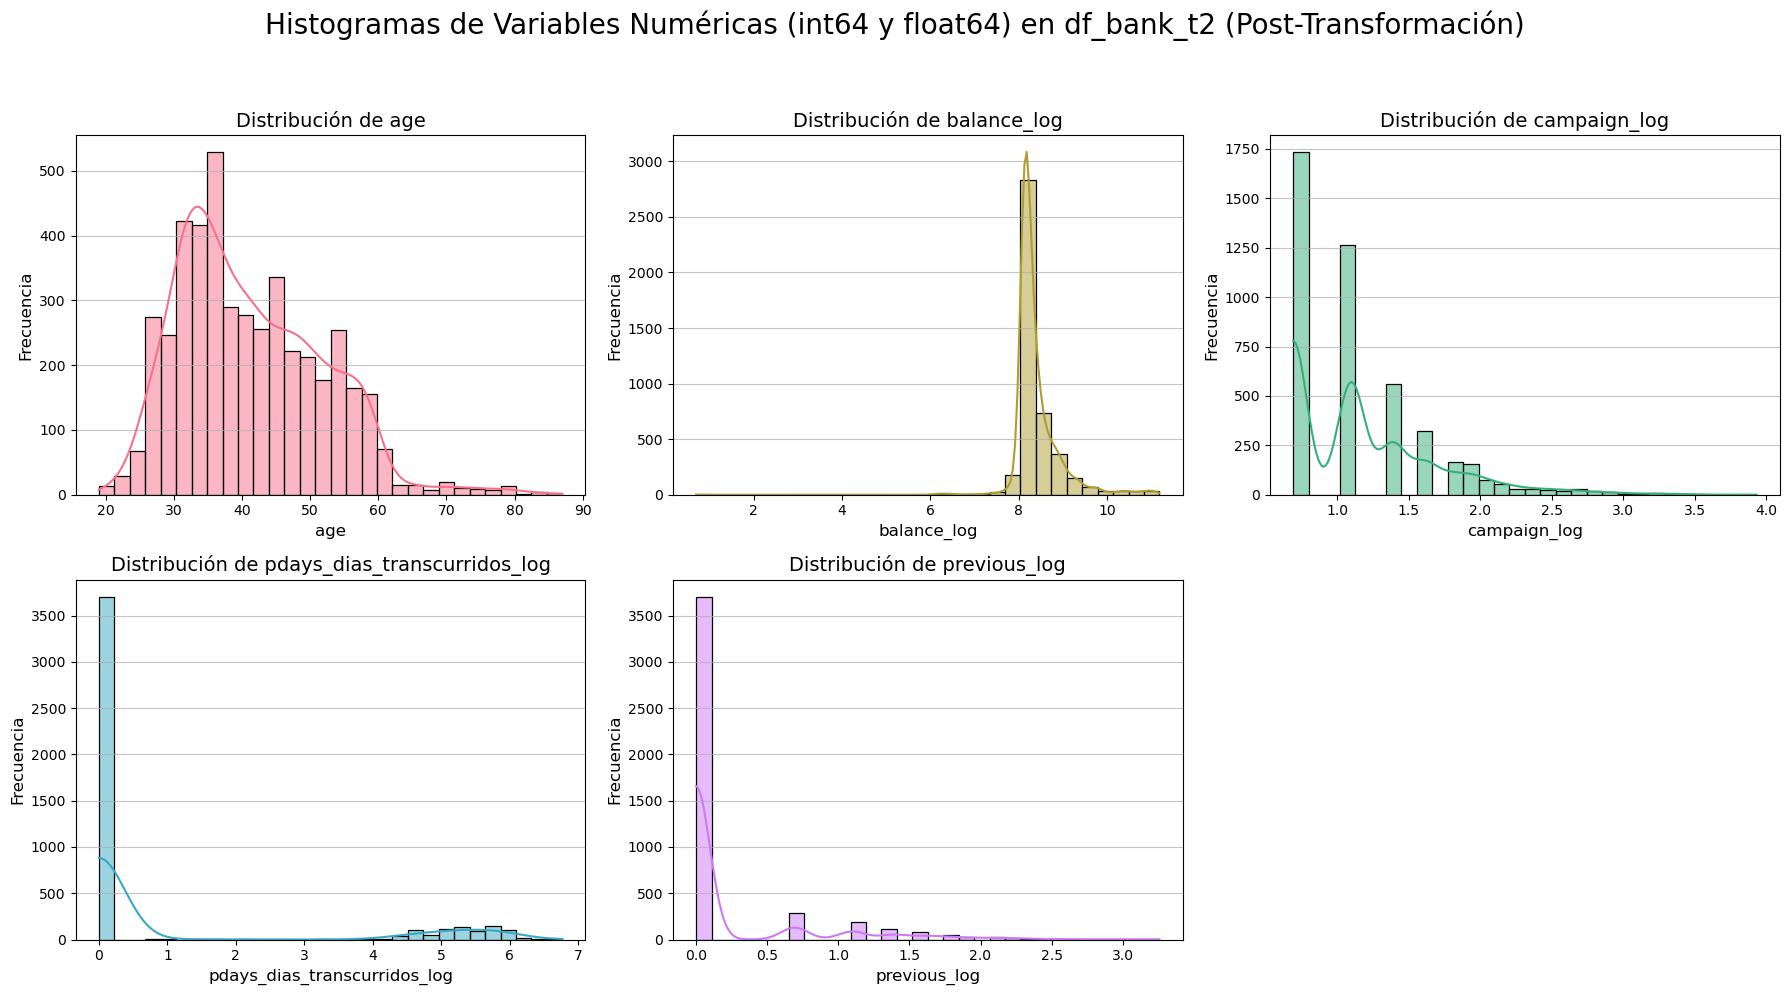

In [13]:
# --- Identificar las columnas de tipo int64 y float64 ---
numeric_cols = df_bank_t2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir 'id' si existe y no es una característica relevante para la distribución
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'numerical_feature_B_float' in numeric_cols: # Ejemplo de una columna float original
    pass # Mantenerla si quieres verla también

print(f"\n--- Columnas numéricas (int64 y float64) identificadas para histogramas: {numeric_cols} ---")

if not numeric_cols:
    print("\nNo se encontraron columnas de tipo 'int64' ni 'float64' en el DataFrame 'df_bank_t2'.")
else:
    # Definir una paleta de colores para los histogramas
    colors = sns.color_palette("husl", n_colors=len(numeric_cols))

    # Crear una figura con subplots para los histogramas
    num_cols_to_plot = len(numeric_cols)
    n_rows = (num_cols_to_plot + 2) // 3 # Calcula el número de filas necesario (aproximadamente 3 columnas por fila)
    plt.figure(figsize=(18, 5 * n_rows))
    plt.suptitle('Histogramas de Variables Numéricas (int64 y float64) en df_bank_t2 (Post-Transformación)', fontsize=20, y=1.02)

    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, 3, i + 1) # n_rows filas, 3 columnas, posición i+1
        sns.histplot(df_bank_t2[col], kde=True, color=colors[i], bins=30) # kde=True para la curva de densidad
        plt.title(f'Distribución de {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.grid(axis='y', alpha=0.75)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar layout para que no se superpongan los títulos
    plt.show()


Ahora como paso final ordenaremos las columnas y exportaremos a un csv el dataframe ya trasformado las variables numericas

In [14]:
df_bank_t2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'poutcome', 'hubo_contacto_?',
       'get_account_?', 'balance_log', 'campaign_log',
       'pdays_dias_transcurridos_log', 'previous_log'],
      dtype='object')

In [15]:
# Ordenar las columnas según el orden especificado
ordered_columns = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    'day', 'month', 'poutcome', 'hubo_contacto_?', 'age', 'balance_log',
    'campaign_log', 'pdays_dias_transcurridos_log', 'previous_log', 'get_account_?'
]

df_bank_t2 = df_bank_t2[ordered_columns]

# Exportar a CSV separado por comas
df_bank_t2.to_csv('ready_bank_prediction.csv', index=False)

Una vez hecho todo esto estamos listos para pasar al analisis bivariado y posteriormente a la contruccion del modelo logistico